# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           2.64e-20
Time:                        19:22:00   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

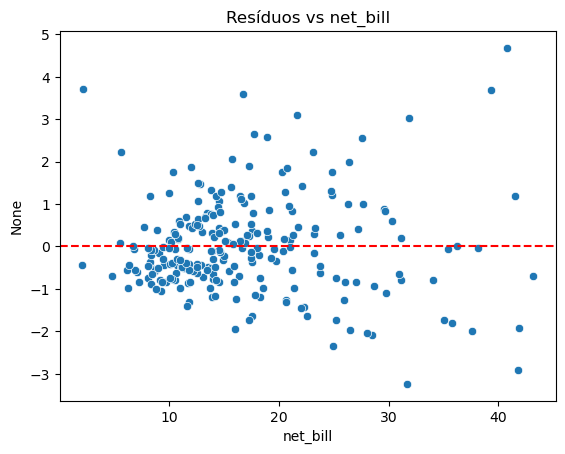

R² original: 0.3349
R² log(X): 0.2947
R² polinomial: 0.3364


In [3]:
#1
# Carregar base de gorjetas
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar matriz de design
y, X = dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

#2
# Ajustar modelo completo
model_full = sm.OLS(y, X).fit()
print(model_full.summary())

# Modelo reduzido (removendo time que tem p-valor alto)
model_reduced = smf.ols('tip ~ sex + smoker + net_bill', data=tips).fit()
print(model_reduced.summary())

#3
# Gráfico de resíduos vs net_bill
sns.scatterplot(x=tips['net_bill'], y=model_reduced.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs net_bill')
plt.show()

#4
# Testar log(net_bill)
model_logx = smf.ols('tip ~ sex + smoker + np.log(net_bill)', data=tips).fit()

# Testar polinômio de 2º grau
model_poly = smf.ols('tip ~ sex + smoker + net_bill + I(net_bill**2)', data=tips).fit()

# Comparar modelos
print(f"R² original: {model_reduced.rsquared:.4f}")
print(f"R² log(X): {model_logx.rsquared:.4f}")
print(f"R² polinomial: {model_poly.rsquared:.4f}")

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.45
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           3.16e-13
Time:                        19:31:28   Log-Likelihood:                -105.91
No. Observations:                 244   AIC:                             221.8
Df Residuals:                     239   BIC:                             239.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2888      0.080    -16.

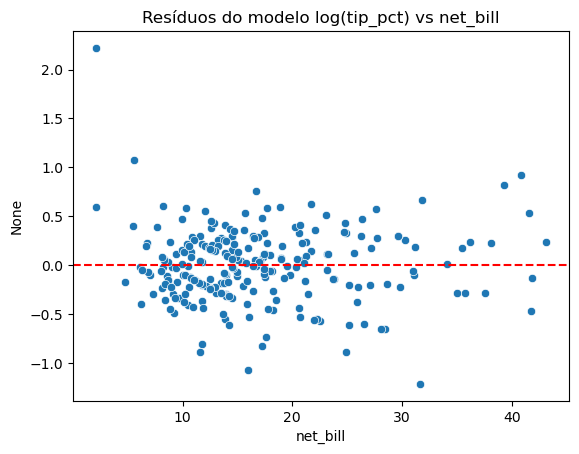

R² log(X): 0.2938
R² polinomial: 0.2603
R² modelo log(tip_pct) na escala original: 0.0878
R² modelo tip original: 0.3349


In [13]:
#1
tips['tip_pct'] = tips['tip'] / tips['net_bill']
tips['log_tip_pct'] = np.log(tips['tip_pct'])

y_log, X_log = dmatrices('log_tip_pct ~ sex + smoker + time + net_bill', 
                         data=tips, return_type='dataframe')

#2
model_log_full = sm.OLS(y_log, X_log).fit()
print(model_log_full.summary())

# Modelo reduzido
model_log_reduced = smf.ols('log_tip_pct ~ smoker + net_bill', data=tips).fit()
print(model_log_reduced.summary())

#3
sns.scatterplot(x=tips['net_bill'], y=model_log_reduced.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos do modelo log(tip_pct) vs net_bill')
plt.show()

#4
# Testar log(net_bill)
model_log_logx = smf.ols('log_tip_pct ~ smoker + np.log(net_bill)', data=tips).fit()

# Testar polinômio
model_log_poly = smf.ols('log_tip_pct ~ smoker + net_bill + I(net_bill**2)', data=tips).fit()

# Comparar
print(f"R² log(X): {model_log_logx.rsquared:.4f}")
print(f"R² polinomial: {model_log_poly.rsquared:.4f}")

#5
# Calcular R² na escala original
tips['pred_tip_pct'] = np.exp(model_log_reduced.fittedvalues)
r2_tip_pct = r2_score(tips['tip_pct'], tips['pred_tip_pct'])

print(f"R² modelo log(tip_pct) na escala original: {r2_tip_pct:.4f}")
print(f"R² modelo tip original: {model_reduced.rsquared:.4f}")

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:01:37   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

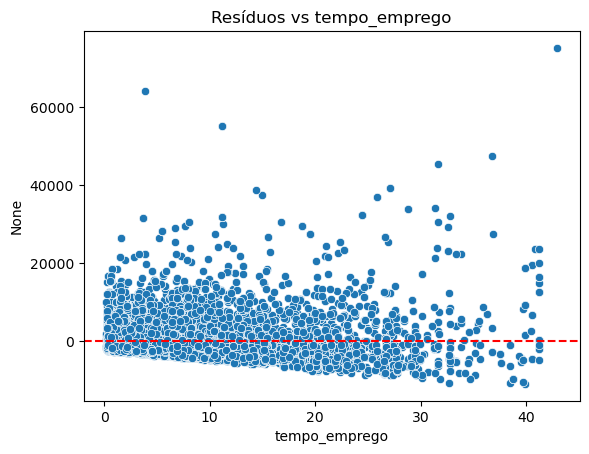

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:01:38   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

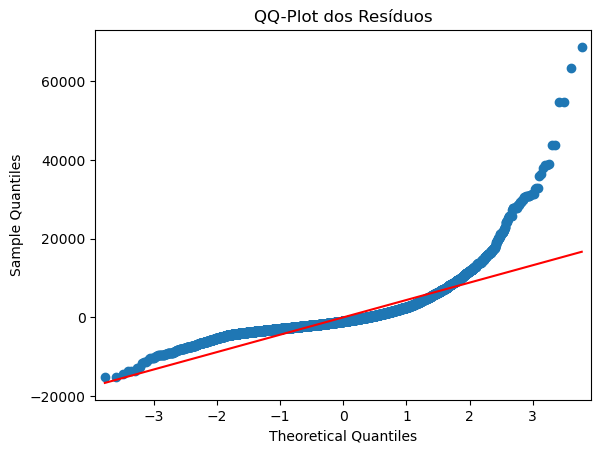

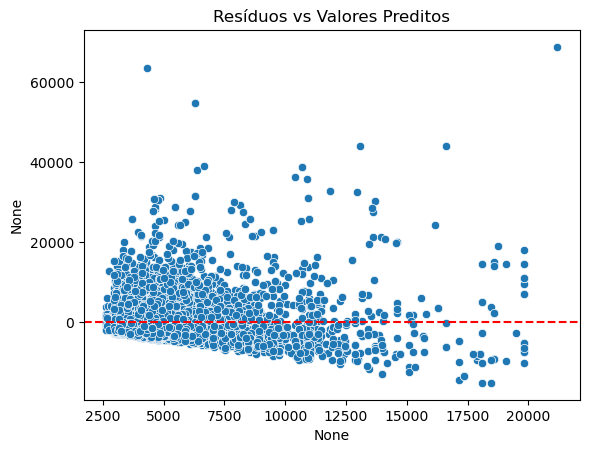

In [29]:
#1
url = 'https://raw.githubusercontent.com/dsvitorchaves/EBAC/73c1a3756610e31227631b17ba68d25880f984c9/previsao_de_renda.csv'
renda = pd.read_csv(url)

# Modelo simples
model_renda_simple = smf.ols('renda ~ tempo_emprego', data=renda).fit()
print(model_renda_simple.summary())

#2
# Gráfico de resíduos
sns.scatterplot(x=renda['tempo_emprego'], y=model_renda_simple.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs tempo_emprego')
plt.show()

# Sugestões de melhorias:
# 1. Transformar renda (log ou Box-Cox) devido à assimetria
# 2. Adicionar termos polinomiais para tempo_emprego
# 3. Considerar outliers

#3
# Modelo múltiplo
formula = '''renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + 
             tipo_renda + educacao + estado_civil + tipo_residencia + idade + 
             tempo_emprego + qt_pessoas_residencia'''

model_renda_multi = smf.ols(formula, data=renda).fit()
print(model_renda_multi.summary())



#4
# Modelo com variáveis significantes
model_renda_reduced = smf.ols('''renda ~ tipo_renda + educacao + 
                                tempo_emprego + I(tempo_emprego**2)''', 
                             data=renda).fit()
print(model_renda_reduced.summary())

# Interpretação:
# - tempo_emprego tem relação positiva com renda
# - Educação superior aumenta a renda esperada
# - Relação quadrática com tempo_emprego sugere aumento marginal decrescente

#5
# QQ-Plot
sm.qqplot(model_renda_reduced.resid, line='s')
plt.title('QQ-Plot dos Resíduos')
plt.show()



# Resíduos vs preditos
sns.scatterplot(x=model_renda_reduced.fittedvalues, y=model_renda_reduced.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs Valores Preditos')
plt.show()

# Avaliação:
# 1. Resíduos ainda apresentam padrão não-linear
# 2. Sugere-se transformação logarítmica na variável resposta
# 3. Possível necessidade de modelos mais robustos para lidar com heterocedasticidade